In [4]:
import pandas as pd
from pathlib import Path
from glob import glob
import numpy as np
from datetime import datetime,timedelta
from tqdm.notebook import tqdm
import pynmea2

In [1]:
files_list = glob(r'/media/beth/Transcend/Eurec4a_master/Caravela/CaravelaPCS/Datalog/Y20/*/*'+ '/group1*')  
files_list.sort()

li = []

for filename in tqdm(files_list):
    df = pd.read_csv(filename)
    li.append(df)

sl = pd.concat(li, axis=0)

NameError: name 'glob' is not defined

In [ ]:
files_list

In [ ]:
subset = pd.DataFrame()
subset['datetime'] = (sl['Date'].astype(str) +' '+ sl['Time'])
subset['heading'] = sl['U5_??HPR_F1']
subset['pitch'] = sl['U5_??HPR_F2']
subset['roll'] = sl['U5_??HPR_F3']
subset = subset.reset_index()

In [ ]:
subset.head()

In [ ]:
dt = []
for i in tqdm(range(0, 20000000)):
    dt.append(datetime.fromisoformat([i]))
for i in tqdm(range(20000000, len(subset['datetime']))):
    dt.append(datetime.fromisoformat([i]))
subset['datetime UTC'] = dt

In [ ]:
subset.head()

In [ ]:
subset = subset.drop(['index'],axis=1)

In [ ]:
subset = subset.drop(['datetime'],axis=1)

In [ ]:
subset.to_csv('CARAVELA_Motion.csv',index = None)

In [5]:
baa = pd.read_csv('CARAVELA_Motion.csv')# import file to test it

In [12]:
x=[]
for i in tqdm(range(len(baa['datetime UTC']))):
    x.append(datetime.strptime(baa['datetime UTC'][i], '%Y-%m-%d %H:%M:%S'))
baa['datetime_parsed'] = x

In [6]:
import matplotlib.pyplot as plt

KeyboardInterrupt: 

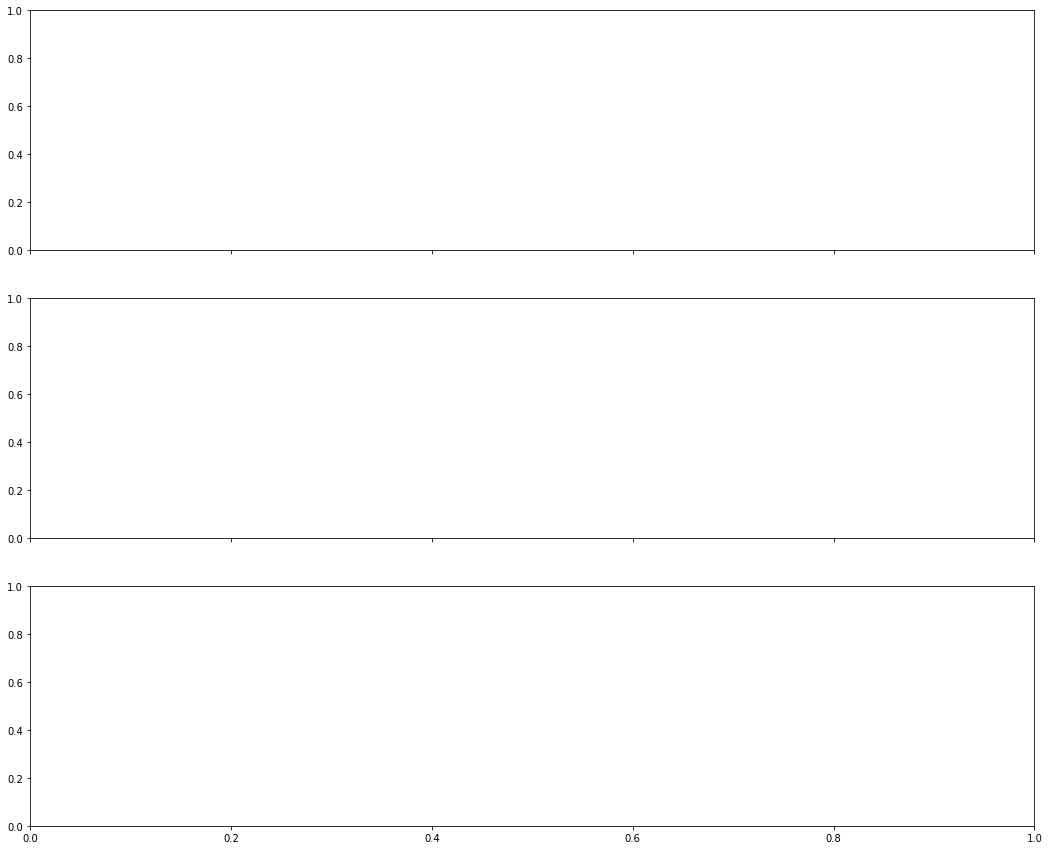

In [9]:
fig,ax = plt.subplots(3,1, figsize=(18, 15),sharex=True)
ax=ax.ravel()
ax[0].plot(baa['datetime UTC'], baa['heading'])
ax[1].plot(baa['datetime UTC'], baa['pitch'])
ax[2].plot(baa['datetime UTC'], baa['roll'])
ax[0].set_ylabel('heading')
ax[1].set_ylabel('pitch')
ax[2].set_ylabel('roll')
ax[2].set_xlabel('Datetime')